### Student Information
Name: 謝舜卿

Student ID: NCCU_113152012

GitHub ID: Megan123123


---


### Instructions


### First Phase Submission


1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__

2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.

4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.


### Second Phase Submission


**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__

2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.


# Phase 1


Rows: 847
Labels: {'neutral': 423, 'negative': 315, 'positive': 109}


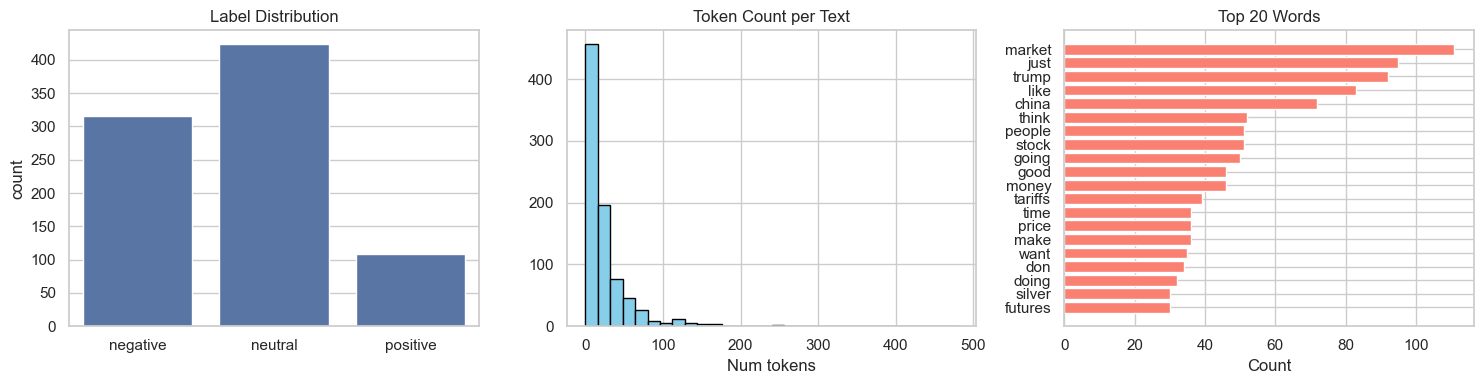

Term-document matrix: (847, 1448)
Sample vocabulary: ['market', 'just', 'trump', 'like', 'china', 'think', 'people', 'stock', 'going', 'good']


In [ ]:
# Phase 1

# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

sns.set(style='whitegrid')

# Load dataset (keep only needed columns)
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df = df[['text', 'label']].dropna().copy()

# Map numeric labels to names (optional, for plots)
label_map = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
df['label_name'] = df['label'].map(label_map)

# Simple text clean (minimal)
url_pat = re.compile(r'https?://\S+|www\.\S+')
mention_pat = re.compile(r'@\w+')
nonword_pat = re.compile(r'[^a-zA-Z\s]')

def clean_text(t: str) -> str:
    t = str(t).lower()
    t = url_pat.sub(' ', t)
    t = mention_pat.sub(' ', t)
    t = nonword_pat.sub(' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

df['text_clean'] = df['text'].apply(clean_text)

print('Rows:', len(df))
print('Labels:', df['label_name'].value_counts().to_dict())

# Basic visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) Class distribution
sns.countplot(x='label_name', data=df, ax=axes[0], order=['negative','neutral','positive'])
axes[0].set_title('Label Distribution')
axes[0].set_xlabel('')

# 2) Text length histogram
lengths = df['text_clean'].str.split().apply(len)
axes[1].hist(lengths, bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Token Count per Text')
axes[1].set_xlabel('Num tokens')

# 3) Top words bar chart (from CountVectorizer)
cv = CountVectorizer(max_features=5000, stop_words='english', min_df=2)
X = cv.fit_transform(df['text_clean'])
vocab = np.array(cv.get_feature_names_out())
word_counts = np.asarray(X.sum(axis=0)).ravel()
order = word_counts.argsort()[::-1][:20]
axes[2].barh(vocab[order][::-1], word_counts[order][::-1], color='salmon')
axes[2].set_title('Top 20 Words')
axes[2].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Term-document matrix summary
print('Term-document matrix:', X.shape)
print('Sample vocabulary:', vocab[order[:10]].tolist())


# Phase 2


In [ ]:
### Begin Assignment Here


Accuracy:
  Count + MultinomialNB:  0.594
  TF-IDF + MultinomialNB: 0.629
  TF-IDF + GaussianNB:    0.500


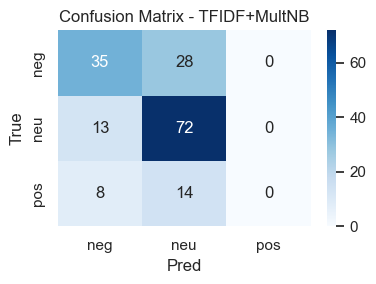

Pattern feature shapes: (677, 1294) (170, 1294)
Macro-F1 (baseline vs augmented):
  Count + MultNB:    0.427  ->  0.436  (Δ +0.009)
  TF-IDF + MultNB:   0.437  ->  0.442  (Δ +0.005)

Notes: fit on train only (done); itemsets not phrases; consider n-grams;
class imbalance → macro-F1, class_weight; tune min_sup for patterns;
cleaning can add custom stopwords and emoji/URL normalization.


In [103]:
# Phase 2: TF-IDF/Count + Naive Bayes, Frequent Patterns, Augmentation

# Assumes Phase 1 created df with text_clean and label_name
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import Counter

sns.set(style='whitegrid')

# Build X/y
X_text = df['text_clean']
y = df['label_name']

# Split (fit on train only)
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Features
cv = CountVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_count = cv.fit_transform(X_train)
X_test_count = cv.transform(X_test)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Naive Bayes (baselines)
nb_count = MultinomialNB().fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)
acc_count = accuracy_score(y_test, y_pred_count)

nb_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

nb_g_tfidf = GaussianNB().fit(X_train_tfidf.toarray(), y_train)
y_pred_g_tfidf = nb_g_tfidf.predict(X_test_tfidf.toarray())
acc_g_tfidf = accuracy_score(y_test, y_pred_g_tfidf)

print('Accuracy:')
print(f'  Count + MultinomialNB:  {acc_count:.3f}')
print(f'  TF-IDF + MultinomialNB: {acc_tfidf:.3f}')
print(f'  TF-IDF + GaussianNB:    {acc_g_tfidf:.3f}')

# Confusion matrix for best model
accs = [acc_count, acc_tfidf, acc_g_tfidf]
models = ['Count+MultNB', 'TFIDF+MultNB', 'TFIDF+GNB']
ypreds = [y_pred_count, y_pred_tfidf, y_pred_g_tfidf]
best_i = int(np.argmax(accs))
cm = confusion_matrix(y_test, ypreds[best_i], labels=['negative','neutral','positive'])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['neg','neu','pos'], yticklabels=['neg','neu','pos'])
plt.title(f'Confusion Matrix - {models[best_i]}')
plt.ylabel('True')
plt.xlabel('Pred')
plt.tight_layout()
plt.show()

# Frequent pattern mining (train-only; unordered itemsets)
def tokenize(s):
    return [w for w in s.split() if len(w)>2 and w.isalpha()]

train_tokens = [tokenize(t) for t in X_train]
# Single-token support
single_counts = Counter(t for doc in train_tokens for t in set(doc))
N_docs = len(train_tokens)
min_sup = max(1, int(0.01 * N_docs))  # ~1% support
patterns_1 = {t for t,c in single_counts.items() if c >= min_sup}
# Pair patterns (limit for speed)
pair_counts = Counter()
for doc in train_tokens:
    sd = sorted(set(doc))
    sd = [w for w in sd if w in patterns_1]
    for i in range(len(sd)):
        for j in range(i+1, min(i+1+10, len(sd))):
            pair_counts[(sd[i], sd[j])] += 1
patterns_2 = {p for p,c in pair_counts.items() if c >= min_sup}
all_patterns = list(patterns_2) + [(w,) for w in patterns_1]

# Pattern features
def pattern_features(texts, patterns):
    feats = []
    for t in texts:
        toks = set(tokenize(t))
        row = [1 if all(w in toks for w in pat) else 0 for pat in patterns]
        feats.append(row)
    return np.array(feats)

X_train_pat = pattern_features(X_train, all_patterns)
X_test_pat  = pattern_features(X_test, all_patterns)
print('Pattern feature shapes:', X_train_pat.shape, X_test_pat.shape)

# Augmentation (macro-F1)
nb_count_aug = MultinomialNB().fit(np.hstack([X_train_count.toarray(), X_train_pat]), y_train)
y_pred_count_aug = nb_count_aug.predict(np.hstack([X_test_count.toarray(), X_test_pat]))

nb_tfidf_aug = MultinomialNB().fit(np.hstack([X_train_tfidf.toarray(), X_train_pat]), y_train)
y_pred_tfidf_aug = nb_tfidf_aug.predict(np.hstack([X_test_tfidf.toarray(), X_test_pat]))

f1_count = f1_score(y_test, y_pred_count, average='macro')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
f1_count_aug = f1_score(y_test, y_pred_count_aug, average='macro')
f1_tfidf_aug = f1_score(y_test, y_pred_tfidf_aug, average='macro')

print('Macro-F1 (baseline vs augmented):')
print(f'  Count + MultNB:    {f1_count:.3f}  ->  {f1_count_aug:.3f}  (Δ {f1_count_aug - f1_count:+.3f})')
print(f'  TF-IDF + MultNB:   {f1_tfidf:.3f}  ->  {f1_tfidf_aug:.3f}  (Δ {f1_tfidf_aug - f1_tfidf:+.3f})')

# Brief inefficiency notes
print('\nNotes: fit on train only (done); itemsets not phrases; consider n-grams;')
print('class imbalance → macro-F1, class_weight; tune min_sup for patterns;')
print('cleaning can add custom stopwords and emoji/URL normalization.')
